In [1]:
import numpy as np
import PIL as Image
import cv2 
from matplotlib import pyplot as plt


In [2]:
h,w= 18,18
a = np.ones((h,w),dtype=np.uint8)
a *= 255

In [3]:
#vertical line

a[:,[3,5,7]] *= 0

In [20]:
for i in range(18):
    a[i][i] *= 0 

In [21]:
b= a[:5,:5]
#b *= 255

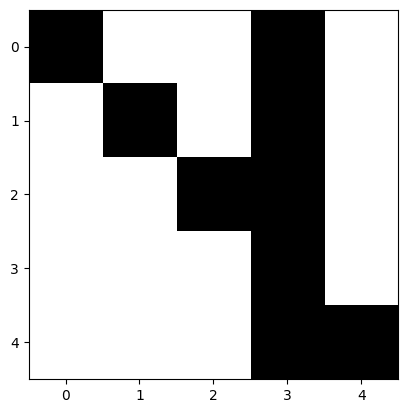

In [22]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

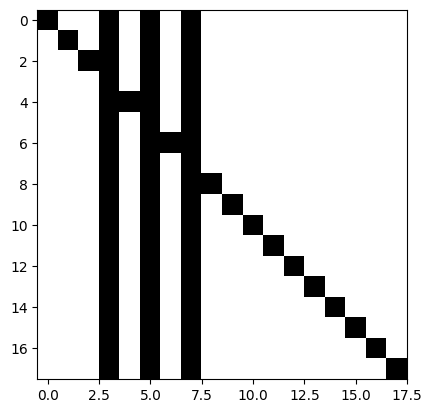

In [23]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

In [179]:
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]],dtype=np.uint8)

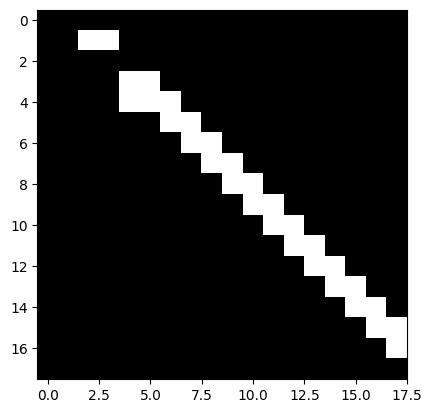

In [32]:
#img = cv2.imread('trek.jpg', cv2.IMREAD_GRAYSCALE)
img = a
# Create the kernel
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernel_hor = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
# Perform the convolution
result = cv2.filter2D(img, -1, kernel_hor)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

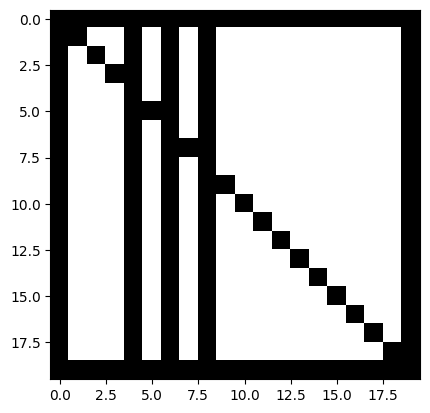

In [24]:

# Load your image
#img = cv2.imread('line.png', cv2.IMREAD_GRAYSCALE)
img = a
# Create the kernel
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
#kernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
# Get the size of the image and the kernel
img_h, img_w = img.shape
kernel_h, kernel_w = kernel.shape

# Create a padding around the image
pad = (kernel_h - 1) // 2
#print(pad)
img = np.pad(img, pad, mode='constant')

# Create an empty array for the result
result = np.zeros_like(img)

# Loop through the image
for y in range(pad, img_h + pad):
    for x in range(pad, img_w + pad):
        # Get a portion of the image that corresponds to the size of the kernel
        portion = img[y - pad:y + pad + 1, x - pad:x + pad + 1]
        # Perform the convolution and store the result in the result array
        result[y, x] = (portion * kernel).sum()

# Crop the result to remove the padding
result = result[pad:-pad, pad:-pad]

# Show the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

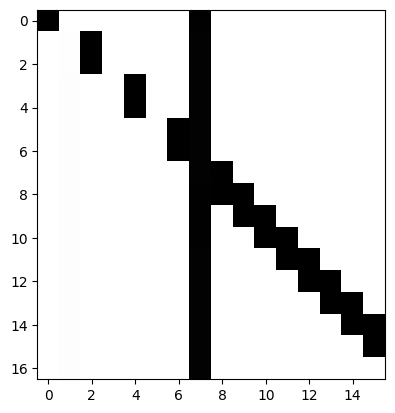

In [25]:
# Set a threshold to determine which pixels belong to the line
threshold = 200

# Get the row and column indices that have values above the threshold
row_indices, col_indices = np.where(result > threshold)

# Get the minimum and maximum row and column indices
min_row, max_row = np.min(row_indices), np.max(row_indices)
min_col, max_col = np.min(col_indices), np.max(col_indices)

# Crop the result to show only the line
cropped_result = result[min_row:max_row, min_col:max_col]
# Show the cropped result
grey = 255

# Create a grey background image with the same size as the cropped result
background = np.ones(cropped_result.shape, dtype=np.uint8) * grey

# Paste the cropped result on the grey background
background = np.where(cropped_result > 0, cropped_result, background)

# Show the result
plt.imshow(background, cmap='gray', interpolation='nearest')
plt.show()

In [53]:
cropped_result


array([], shape=(4, 0), dtype=uint8)

In [17]:
len(multi_result)

18